# Initial parameters in order to make everything working

In [ ]:
!pip install pydash

In [ ]:
import tensorflow
from google.colab import drive
import random
import numpy as np
from tensorflow import keras
from tqdm import notebook
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.ops import math_ops
import itertools
import pandas as pd
from tqdm import tqdm_notebook
from pydash import at

In [ ]:
from keras import backend as K
import tensorflow as tf

class Constraint(object):

  def __call__(self, w):
    return w 

  def get_config(self):
    return {}

class NewUnitNorm(Constraint):

  def __init__(self, axis=0):
    self.axis = axis

  def __call__(self, w):
    return w / (
        K.epsilon() + 
            tf.reduce_sum(
                w , axis=self.axis, keepdims=True))

# the simplest model - with 1 qubit only data

## First we'll create the simulative data of our Neural Network of single qubit:
* Input - the read-out error measurements
* Output - the right measurements

the thing is because you need QVM server and quilc compiler - unfortunately you can't run the code inside google - you can generate locally only

### the code

without readout error

In [ ]:
results = []
parameter = np.arange(0,2, 0.1)
qc = get_qc('1q-qvm')
for theta in tqdm_notebook(parameter):
    program = Program()
    program += RX(theta*np.pi,0)
    results.append(qc.run_and_measure(program, trials=10000))

np.save('withoutErrorVer2.npy', results)    

NameError: ignored

with readout error

In [ ]:
resultsWithError = []
parameter = np.arange(0,2, 0.1)
qc1 = get_qc('1q-qvm')
for theta in tqdm_notebook(parameter):
    program1 = Program()
    program1 += RX(theta*np.pi,0)
    program1.define_noisy_readout(0,0.9,0.8)
    resultsWithError.append(qc1.run_and_measure(program1, trials=10000))
    

np.save('withErrorVer2.npy', resultsWithError)    

NameError: ignored

### the data itself

since i did it manually , i'll just upload here the data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withErrorVer2.npy', allow_pickle=True)
y = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withoutErrorVer2.npy', allow_pickle=True)

In [ ]:
x_layer = []
y_layer = []

for i in range(20):
  x_layer.append(x[i][0])
  y_layer.append(y[i][0])

x_layer = np.array(x_layer)
y_layer = np.array(y_layer)

In [ ]:
x_layer.shape

(20, 10000)

histogram with error readout

<BarContainer object of 2 artists>

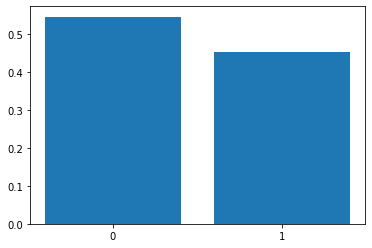

In [ ]:
countx, county = np.unique(x_layer[5], return_counts=True)
plt.bar(countx, county/len(x_layer[5]), tick_label=['0', '1'], align='center')

(array([5468.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4532.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

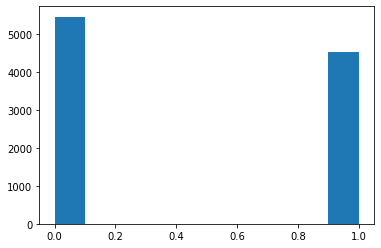

In [ ]:
plt.hist(x_layer[5])

histogram without error readout

<BarContainer object of 2 artists>

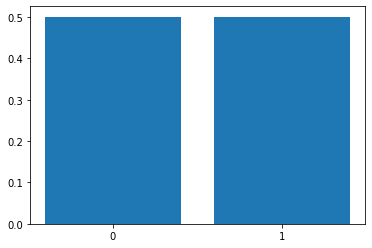

In [ ]:
countx, county = np.unique(y_layer[5], return_counts=True)
plt.bar(countx, county/len(y_layer[5]), tick_label=['0', '1'], align='center')

(array([4995.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5005.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

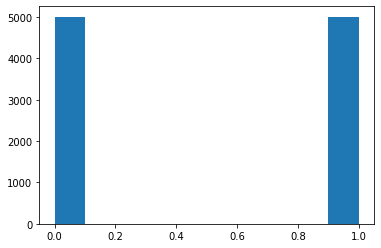

In [ ]:
plt.hist(y_layer[5])

##Our Neural Network model - with constrain weight **and** bias (change the activation function to linear...) **WORKING for single qubit**

In [ ]:
x_train = x_layer[:11,:]
y_train = y_layer[:11,:]
x_test = x_layer[12:14,:]
y_test = y_layer[12:14,:]

In [ ]:
y_test.shape , y_train.shape

((2, 10000), (11, 10000))

In [ ]:
x_train_hist = []
x_test_hist = []
y_train_hist = []
y_test_hist = []

for i in range(11):
  x_train_hist.append(np.histogram(x_train[i], bins=range(3))[0]/np.histogram(x_train[i], bins=range(3),)[0].sum())
  y_train_hist.append(np.histogram(y_train[i], bins=range(3))[0]/np.histogram(y_train[i], bins=range(3),)[0].sum())

for i in range(2):
  x_test_hist.append(np.histogram(x_test[i], bins=range(3))[0]/np.histogram(x_test[i], bins=range(3),)[0].sum())
  y_test_hist.append(np.histogram(y_test[i], bins=range(3))[0]/np.histogram(y_test[i], bins=range(3),)[0].sum())

x_train_hist = np.array(x_train_hist)
x_test_hist = np.array(x_test_hist)
y_train_hist = np.array(y_train_hist)
y_test_hist = np.array(y_test_hist)


In [ ]:
keras.backend.clear_session()
del model

In [ ]:
model = Sequential([
  Dense(2, activation='linear', use_bias=False, kernel_constraint=NewUnitNorm(axis=1)),
])
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model.compile(
  optimizer=opt,
  loss = "mse",
  metrics=['mse'],
)

Epoch 1/1500
1/1 [==============================] - 0s 250ms/step - loss: 0.1705 - mse: 0.1705
Epoch 2/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0894 - mse: 0.0894
Epoch 3/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0840 - mse: 0.0840
Epoch 4/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0769 - mse: 0.0769
Epoch 5/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0686 - mse: 0.0686
Epoch 6/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0597 - mse: 0.0597
Epoch 7/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0505 - mse: 0.0505
Epoch 8/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0416 - mse: 0.0416
Epoch 9/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0332 - mse: 0.0332
Epoch 10/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0256 - mse: 0.0256
Epoch 11/1500
1/1 [==============================] - 0s 4ms/step - 

Text(0.5, 0, 'epoch')

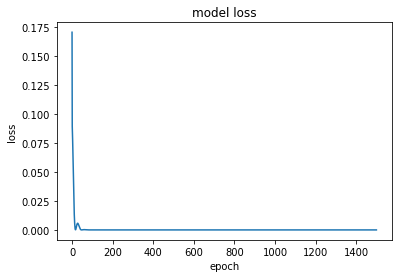

In [ ]:
history = model.fit(
  x_train_hist,
  y_train_hist,
  epochs=1500,
)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

here we get the $A^{-1}$ error mitigation matrix

In [ ]:
model.get_weights()

[array([[ 1.1407204 , -0.14072041],
        [-0.28554887,  1.2855488 ]], dtype=float32)]

here we evaluating with our test group - and we see it's working

In [ ]:
model.evaluate(
  x_test_hist,
  y_test_hist
)

1/1 [==============================] - 0s 213ms/step - loss: 2.3016e-05 - mse: 2.3016e-05


[2.3015540136839263e-05, 2.3015540136839263e-05]

In [ ]:
y_perdiction = model.predict(x_test_hist)

In [ ]:
x_test_hist*10000

array([[2719., 7281.],
       [3379., 6621.]])

In [ ]:
y_perdiction*10000

array([[1022.5383, 8977.461 ],
       [1963.8759, 8036.1235]], dtype=float32)

In [ ]:
y_test_hist*10000

array([[ 971., 9029.],
       [2008., 7992.]])

we inverse our matrix and found out our $A$ matrix, and it's the same as the $\varepsilon$ and $\eta$ i wrote in the data

In [ ]:
np.linalg.inv(np.transpose(model.get_weights()[0]))

array([[0.9013367 , 0.20020686],
       [0.09866329, 0.7997932 ]], dtype=float32)

##Our Neural Network model - with constrain weight **and** bias (change the activation function to linear...) **WORKING for single qubit** first and end angles only

In [ ]:
x_train = x_layer[:11,:]
y_train = y_layer[:11,:]
x_test = x_layer[12:14,:]
y_test = y_layer[12:14,:]

In [ ]:
y_test.shape , y_train.shape

((2, 10000), (11, 10000))

In [ ]:
x_train_hist = []
x_test_hist = []
y_train_hist = []
y_test_hist = []

for i in [0,10]:
  x_train_hist.append(np.histogram(x_train[i], bins=range(3))[0]/np.histogram(x_train[i], bins=range(3),)[0].sum())
  y_train_hist.append(np.histogram(y_train[i], bins=range(3))[0]/np.histogram(y_train[i], bins=range(3),)[0].sum())

for i in range(2):
  x_test_hist.append(np.histogram(x_test[i], bins=range(3))[0]/np.histogram(x_test[i], bins=range(3),)[0].sum())
  y_test_hist.append(np.histogram(y_test[i], bins=range(3))[0]/np.histogram(y_test[i], bins=range(3),)[0].sum())

x_train_hist = np.array(x_train_hist)
x_test_hist = np.array(x_test_hist)
y_train_hist = np.array(y_train_hist)
y_test_hist = np.array(y_test_hist)


In [ ]:
y_train_hist, x_train_hist

(array([[1., 0.],
        [0., 1.]]), array([[0.9022, 0.0978],
        [0.1999, 0.8001]]))

In [ ]:
keras.backend.clear_session()
del model

In [ ]:
model = Sequential([
  Dense(2, activation='linear', use_bias=False, kernel_constraint=NewUnitNorm(axis=1)),
])
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model.compile(
  optimizer=opt,
  loss = "mse",
  metrics=['mse'],
)

Epoch 1/1500
1/1 [==============================] - 0s 239ms/step - loss: 1.1256 - mse: 1.1256
Epoch 2/1500
1/1 [==============================] - 0s 4ms/step - loss: 2.0777 - mse: 2.0777
Epoch 3/1500
1/1 [==============================] - 0s 3ms/step - loss: 1.7236 - mse: 1.7236
Epoch 4/1500
1/1 [==============================] - 0s 4ms/step - loss: 1.3326 - mse: 1.3326
Epoch 5/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.9567 - mse: 0.9567
Epoch 6/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.6348 - mse: 0.6348
Epoch 7/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.3889 - mse: 0.3889
Epoch 8/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.2256 - mse: 0.2256
Epoch 9/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.1380 - mse: 0.1380
Epoch 10/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.1104 - mse: 0.1104
Epoch 11/1500
1/1 [==============================] - 0s 4ms/step - 

Text(0.5, 0, 'epoch')

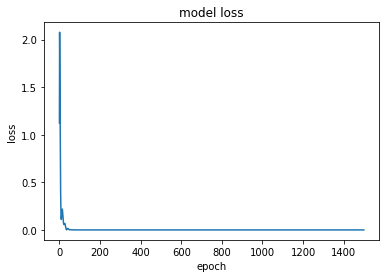

In [ ]:
history = model.fit(
  x_train_hist,
  y_train_hist,
  epochs=1500,
)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

here we get the $A^{-1}$ error mitigation matrix

In [ ]:
model.get_weights()

[array([[ 1.1392566 , -0.13925669],
        [-0.28463617,  1.284636  ]], dtype=float32)]

here we evaluating with our test group - and we see it's working

In [ ]:
model.evaluate(
  x_test_hist,
  y_test_hist
)

1/1 [==============================] - 0s 213ms/step - loss: 2.3016e-05 - mse: 2.3016e-05


[2.3015540136839263e-05, 2.3015540136839263e-05]

In [ ]:
y_perdiction = model.predict(x_test_hist)

In [ ]:
x_test_hist*10000

array([[2719., 7281.],
       [3379., 6621.]])

In [ ]:
y_perdiction*10000

array([[1022.5383, 8977.461 ],
       [1963.8759, 8036.1235]], dtype=float32)

In [ ]:
y_test_hist*10000

array([[ 971., 9029.],
       [2008., 7992.]])

we inverse our matrix and found out our $A$ matrix, and it's the same as the $\varepsilon$ and $\eta$ i wrote in the data

In [ ]:
np.linalg.inv(np.transpose(model.get_weights()[0]))

array([[0.9022001 , 0.19990003],
       [0.09779999, 0.8001001 ]], dtype=float32)

##Our Neural Network model - with constrain weight **and** bias (change the activation function to linear...) **WORKING for single qubit** first and middle angles only

In [ ]:
x_train = x_layer[:11,:]
y_train = y_layer[:11,:]
x_test = x_layer[12:14,:]
y_test = y_layer[12:14,:]

In [ ]:
y_test.shape , y_train.shape

((2, 10000), (11, 10000))

In [ ]:
x_train_hist = []
x_test_hist = []
y_train_hist = []
y_test_hist = []

for i in [0,5]:
  x_train_hist.append(np.histogram(x_train[i], bins=range(3))[0]/np.histogram(x_train[i], bins=range(3),)[0].sum())
  y_train_hist.append(np.histogram(y_train[i], bins=range(3))[0]/np.histogram(y_train[i], bins=range(3),)[0].sum())

for i in range(2):
  x_test_hist.append(np.histogram(x_test[i], bins=range(3))[0]/np.histogram(x_test[i], bins=range(3),)[0].sum())
  y_test_hist.append(np.histogram(y_test[i], bins=range(3))[0]/np.histogram(y_test[i], bins=range(3),)[0].sum())

x_train_hist = np.array(x_train_hist)
x_test_hist = np.array(x_test_hist)
y_train_hist = np.array(y_train_hist)
y_test_hist = np.array(y_test_hist)


In [ ]:
y_train_hist, x_train_hist

(array([[1., 0.],
        [0., 1.]]), array([[0.9022, 0.0978],
        [0.1999, 0.8001]]))

In [ ]:
keras.backend.clear_session()
del model

In [ ]:
model = Sequential([
  Dense(2, activation='linear', use_bias=False, kernel_constraint=NewUnitNorm(axis=1)),
])
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model.compile(
  optimizer=opt,
  loss = "mse",
  metrics=['mse'],
)

Epoch 1/100
1/1 [==============================] - 0s 231ms/step - loss: 0.9231 - mse: 0.9231
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2075 - mse: 0.2075
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1880 - mse: 0.1880
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1659 - mse: 0.1659
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1440 - mse: 0.1440
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1243 - mse: 0.1243
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1081 - mse: 0.1081
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0957 - mse: 0.0957
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0868 - mse: 0.0868
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0805 - mse: 0.0805
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 0.075

Text(0.5, 0, 'epoch')

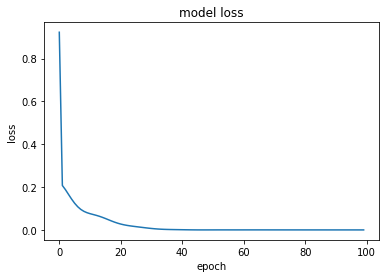

In [ ]:
history = model.fit(
  x_train_hist,
  y_train_hist,
  epochs=100,
)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

here we get the $A^{-1}$ error mitigation matrix

In [ ]:
model.get_weights()

[array([[ 1.1385195 , -0.13851964],
        [-0.27533492,  1.2753348 ]], dtype=float32)]

here we evaluating with our test group - and we see it's working

In [ ]:
model.evaluate(
  x_test_hist,
  y_test_hist
)

1/1 [==============================] - 0s 213ms/step - loss: 2.3016e-05 - mse: 2.3016e-05


[2.3015540136839263e-05, 2.3015540136839263e-05]

In [ ]:
y_perdiction = model.predict(x_test_hist)

In [ ]:
x_test_hist*10000

array([[2719., 7281.],
       [3379., 6621.]])

In [ ]:
y_perdiction*10000

array([[1022.5383, 8977.461 ],
       [1963.8759, 8036.1235]], dtype=float32)

In [ ]:
y_test_hist*10000

array([[ 971., 9029.],
       [2008., 7992.]])

we inverse our matrix and found out our $A$ matrix, and it's the same as the $\varepsilon$ and $\eta$ i wrote in the data

In [ ]:
np.linalg.inv(np.transpose(model.get_weights()[0]))

array([[0.9020271 , 0.19474067],
       [0.09797307, 0.8052594 ]], dtype=float32)

# little more complicated - more than 1 qubit (simple - 2 qubits)

## First we'll create the simulative data of our Neural Network:
* Input - the read-out error measurements
* Output - the right measurements

the thing is because you need QVM server and quilc compiler - unfortunately you can't run the code inside google - you can generate locally only

### the code

The seed generator code for our angles

In [ ]:
seed = np.random.rand(100,4)

without readout error

In [ ]:
results = []
qc = get_qc('4q-qvm')
count = 0
for theta in tqdm_notebook(seed):
    program = Program()
    for i in range(4):
        program += RX(theta[i]*np.pi,i)
    results.append(qc.run_and_measure(program, trials=10000))

np.save('withoutErrorVer2_4qbits.npy', results)    

NameError: ignored

with readout error

In [ ]:
resultsWithError = []
qc1 = get_qc('4q-qvm')
for theta in tqdm_notebook(seed):
    program1 = Program()
    for i in range(4):
        program1 += RX(theta[i]*np.pi,i)
        program1.define_noisy_readout(i,0.9,0.8)
    resultsWithError.append(qc1.run_and_measure(program1, trials=10000))
    

np.save('withErrorVer2_4qbits.npy', resultsWithError)    


### the data itself

since i did it manually , i'll just upload here the data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withErrorVer2_4qbits.npy', allow_pickle=True)
y = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withoutErrorVer2_4qbits.npy', allow_pickle=True)

In [ ]:
x_layer = []
y_layer = []

for i in notebook.tqdm(range(100)):
  df_x = pd.DataFrame.from_dict(np.transpose(at(x[i], 0, 1)))
  df_y = pd.DataFrame.from_dict(np.transpose(at(y[i], 0, 1)))


  x_bit = []
  y_bit = []
  for j in range(10000):
    x_bit.append(int(df_x.iloc[j].to_string(header=False, index=False).replace("\n ","").replace(" ",""), 2))
    y_bit.append(int(df_y.iloc[j].to_string(header=False, index=False).replace("\n ","").replace(" ",""), 2))
  x_layer.append(x_bit)
  y_layer.append(y_bit)

In [ ]:
string = ["".join(seq) for seq in itertools.product("01", repeat=2)]
string

['00', '01', '10', '11']

histogram with error readout

In [ ]:
#np.histogram(x_layer[5], bins=string)[0]/np.histogram(x_layer[5], bins=string)[0].sum()
np.histogram(y_layer[11], bins=range(5))[0]/np.histogram(y_layer[11], bins=range(5))[0].sum()

array([0.2136, 0.1655, 0.3502, 0.2707])

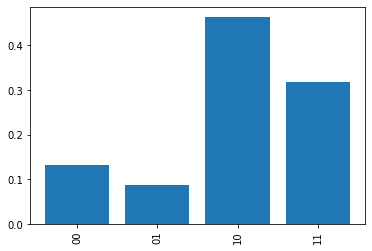

In [ ]:
data = np.histogram(x_layer[99], bins=range(5))[0]/np.histogram(x_layer[99], bins=range(5))[0].sum()
plt.bar(x=range(4), height=data, align='center')
plt.xticks(range(4), string, rotation='vertical')
plt.show()

histogram without error readout

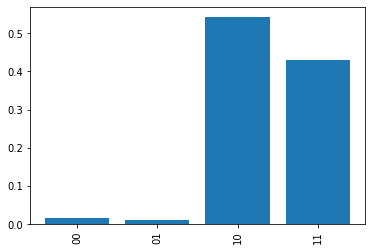

In [ ]:
data = np.histogram(y_layer[99], bins=range(5))[0]/np.histogram(y_layer[99], bins=range(5))[0].sum()
plt.bar(x=range(4), height=data, align='center')
plt.xticks(range(4), string, rotation='vertical')
plt.show()

##Our Neural Network model - with constrain weight **and** bias (change the activation function to linear...) **WORKING for 2 qubits**

In [ ]:
x_train_hist = []
x_test_hist = []
y_train_hist = []
y_test_hist = []

for i in range(90):
  x_train_hist.append(np.histogram(x_layer[i], bins=range(5))[0]/np.histogram(x_layer[i], bins=range(5))[0].sum())
  y_train_hist.append(np.histogram(y_layer[i], bins=range(5))[0]/np.histogram(y_layer[i], bins=range(5))[0].sum())

for i in range(10):
  x_test_hist.append(np.histogram(x_layer[i+90], bins=range(5))[0]/np.histogram(x_layer[i+90], bins=range(5))[0].sum())
  y_test_hist.append(np.histogram(y_layer[i+90], bins=range(5))[0]/np.histogram(y_layer[i+90], bins=range(5))[0].sum())

x_train_hist = np.array(x_train_hist)
x_test_hist = np.array(x_test_hist)
y_train_hist = np.array(y_train_hist)
y_test_hist = np.array(y_test_hist)


In [ ]:
np.linalg.matrix_rank(x_train_hist)

4

In [ ]:
keras.backend.clear_session()
del model

In [ ]:
model = Sequential([
  Dense(4, activation='linear', use_bias=False, kernel_constraint=NewUnitNorm(axis=1)),
])
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model.compile(
  optimizer=opt,
  loss = "mse",
  metrics=['mse'],
)

Epoch 1/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6846 - mse: 0.6846
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 1.1316 - mse: 1.1316
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.8527 - mse: 0.8527
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7070 - mse: 0.7070
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4775 - mse: 0.4775
Epoch 6/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3742 - mse: 0.3742
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3253 - mse: 0.3253
Epoch 8/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.2559 - mse: 0.2559
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2366 - mse: 0.2366
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2327 - mse: 0.2327
Epoch 11/1000
3/3 [==============================] - 0s 4ms/step - lo

Text(0.5, 0, 'epoch')

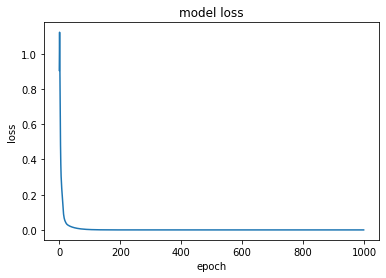

In [ ]:
history = model.fit(
  x_train_hist,
  y_train_hist,
  epochs=1000,
)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

here we get the $A^{-1}$ error mitigation matrix

In [ ]:
model.get_weights(), model.get_weights()[0].shape

([array([[ 1.3029764 , -0.15803623, -0.16204938,  0.01710919],
         [-0.32277465,  1.4610528 ,  0.0373598 , -0.17563805],
         [-0.32434013,  0.03896167,  1.4661124 , -0.18073405],
         [ 0.0786562 , -0.3617741 , -0.36069867,  1.6438165 ]],
        dtype=float32)], (4, 4))

here we evaluating with our test group - and we see it's working

In [ ]:
model.evaluate(
  x_test_hist,
  y_test_hist
)

1/1 [==============================] - 0s 78ms/step - loss: 4.4093e-05 - mse: 4.4093e-05


[4.409341636346653e-05, 4.409341636346653e-05]

In [ ]:
y_perdiction = model.predict(x_test_hist)

In [ ]:
x_test_hist*10000

array([[2316., 2695., 2264., 2725.],
       [1849., 2620., 2242., 3289.],
       [2128., 2040., 2979., 2853.],
       [ 523., 1478., 2135., 5864.],
       [4476., 4492.,  526.,  506.],
       [1767.,  264., 7017.,  952.],
       [3195., 1388., 3745., 1672.],
       [5880., 2913.,  835.,  372.],
       [5650., 1345., 2418.,  587.],
       [1320.,  866., 4638., 3176.]])

In [ ]:
y_perdiction*10000

array([[1627.8475  , 2673.9001  , 2061.753   , 3636.4985  ],
       [1095.0635  , 2433.226   , 1898.9393  , 4572.77    ],
       [1372.4702  , 1728.1719  , 3069.8484  , 3829.508   ],
       [ -26.830519,   38.52311 ,  985.4789  , 9002.827   ],
       [4251.4165  , 5693.115   ,   31.148815,   24.319622],
       [  16.132761,   35.452995, 9667.847   ,  280.56598 ],
       [2631.8577  , 1064.0406  , 4421.6104  , 1882.4902  ],
       [6479.695   , 3224.7468  ,  246.00266 ,   49.555176],
       [6189.6006  ,  954.0592  , 2467.9995  ,  388.33902 ],
       [ 185.92853 ,   88.37346 , 5472.6987  , 4252.998   ]],
      dtype=float32)

In [ ]:
y_test_hist*10000

array([[1.555e+03, 2.752e+03, 2.140e+03, 3.553e+03],
       [1.011e+03, 2.556e+03, 1.854e+03, 4.579e+03],
       [1.445e+03, 1.621e+03, 3.173e+03, 3.761e+03],
       [6.000e+00, 4.700e+01, 8.240e+02, 9.123e+03],
       [4.208e+03, 5.739e+03, 1.400e+01, 3.900e+01],
       [1.700e+01, 0.000e+00, 9.682e+03, 3.010e+02],
       [2.614e+03, 1.128e+03, 4.431e+03, 1.827e+03],
       [6.576e+03, 3.081e+03, 2.420e+02, 1.010e+02],
       [6.207e+03, 9.470e+02, 2.454e+03, 3.920e+02],
       [1.540e+02, 1.150e+02, 5.425e+03, 4.306e+03]])

we inverse our matrix and found out our $A$ matrix, and it's the same as the $\varepsilon$ and $\eta$ i wrote in the data

In [ ]:
np.linalg.inv(np.transpose(model.get_weights()[0]))

array([[0.8110428 , 0.1794011 , 0.17959629, 0.0400831 ],
       [0.08801587, 0.72250736, 0.01989161, 0.15916395],
       [0.09007509, 0.02050602, 0.72098535, 0.158407  ],
       [0.01086635, 0.07758562, 0.07952687, 0.642346  ]], dtype=float32)

In [ ]:
A = np.linalg.inv(np.transpose(model.get_weights()[0]))

In [ ]:
A[:,0] , A[:,0].sum()

(array([0.8110428 , 0.08801587, 0.09007509, 0.01086635], dtype=float32),
 1.0000001)

from the article we know that according to tensor product model - the weight matrix must be equal to four times of kronecker product of 1 qbit that we calculated theoretically...

In [ ]:
np.kron(np.array([[0.9,0.2],[0.1,0.8]]),np.array([[0.9,0.2],[0.1,0.8]]))

array([[0.81, 0.18, 0.18, 0.04],
       [0.09, 0.72, 0.02, 0.16],
       [0.09, 0.02, 0.72, 0.16],
       [0.01, 0.08, 0.08, 0.64]])

In [ ]:
np.array([[0.9,0.2],[0.1,0.8]])

array([[0.9, 0.2],
       [0.1, 0.8]])

# _________________________
# after being done with my inital NN model, now i shall test it's limits and understand it's capacity a bit more , by playing with the amount of angles,measurements and quantity of the qubits 
# _________________________

# little more complicated - more than 1 qubit (simple - 2 qubits) only 8 angles

## First we'll create the simulative data of our Neural Network:
* Input - the read-out error measurements
* Output - the right measurements

the thing is because you need QVM server and quilc compiler - unfortunately you can't run the code inside google - you can generate locally only

### the code

The seed generator code for our angles

In [ ]:
seed = np.random.rand(100,4)

without readout error

In [ ]:
results = []
qc = get_qc('4q-qvm')
count = 0
for theta in tqdm_notebook(seed):
    program = Program()
    for i in range(4):
        program += RX(theta[i]*np.pi,i)
    results.append(qc.run_and_measure(program, trials=10000))

np.save('withoutErrorVer2_4qbits.npy', results)    

NameError: ignored

with readout error

In [ ]:
resultsWithError = []
qc1 = get_qc('4q-qvm')
for theta in tqdm_notebook(seed):
    program1 = Program()
    for i in range(4):
        program1 += RX(theta[i]*np.pi,i)
        program1.define_noisy_readout(i,0.9,0.8)
    resultsWithError.append(qc1.run_and_measure(program1, trials=10000))
    

np.save('withErrorVer2_4qbits.npy', resultsWithError)    


### the data itself

since i did it manually , i'll just upload here the data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withErrorVer2_4qbits.npy', allow_pickle=True)
y = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withoutErrorVer2_4qbits.npy', allow_pickle=True)

In [ ]:
x_layer = []
y_layer = []

for i in notebook.tqdm(range(8)):
  df_x = pd.DataFrame.from_dict(np.transpose(at(x[i], 0, 1)))
  df_y = pd.DataFrame.from_dict(np.transpose(at(y[i], 0, 1)))


  x_bit = []
  y_bit = []
  for j in range(10000):
    x_bit.append(int(df_x.iloc[j].to_string(header=False, index=False).replace("\n ","").replace(" ",""), 2))
    y_bit.append(int(df_y.iloc[j].to_string(header=False, index=False).replace("\n ","").replace(" ",""), 2))
  x_layer.append(x_bit)
  y_layer.append(y_bit)

In [ ]:
string = ["".join(seq) for seq in itertools.product("01", repeat=2)]
string

['00', '01', '10', '11']

histogram with error readout

In [ ]:
#np.histogram(x_layer[5], bins=string)[0]/np.histogram(x_layer[5], bins=string)[0].sum()
np.histogram(y_layer[7], bins=range(5))[0]/np.histogram(y_layer[7], bins=range(5))[0].sum()

array([0.8818, 0.0917, 0.0237, 0.0028])

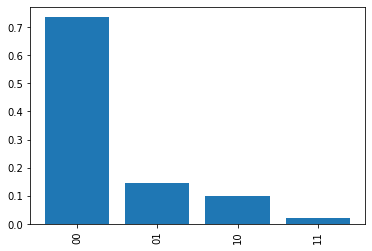

In [ ]:
data = np.histogram(x_layer[7], bins=range(5))[0]/np.histogram(x_layer[7], bins=range(5))[0].sum()
plt.bar(x=range(4), height=data, align='center')
plt.xticks(range(4), string, rotation='vertical')
plt.show()

histogram without error readout

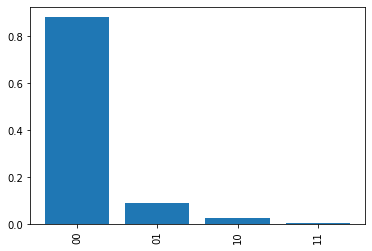

In [ ]:
data = np.histogram(y_layer[7], bins=range(5))[0]/np.histogram(y_layer[7], bins=range(5))[0].sum()
plt.bar(x=range(4), height=data, align='center')
plt.xticks(range(4), string, rotation='vertical')
plt.show()

##Our Neural Network model - with constrain weight **and** bias (change the activation function to linear...) **WORKING for 2 qubits**

In [ ]:
x_train_hist = []
x_test_hist = []
y_train_hist = []
y_test_hist = []

for i in range(7):
  x_train_hist.append(np.histogram(x_layer[i], bins=range(5))[0]/np.histogram(x_layer[i], bins=range(5))[0].sum())
  y_train_hist.append(np.histogram(y_layer[i], bins=range(5))[0]/np.histogram(y_layer[i], bins=range(5))[0].sum())

for i in range(1):
  x_test_hist.append(np.histogram(x_layer[i+7], bins=range(5))[0]/np.histogram(x_layer[i+7], bins=range(5))[0].sum())
  y_test_hist.append(np.histogram(y_layer[i+7], bins=range(5))[0]/np.histogram(y_layer[i+7], bins=range(5))[0].sum())

x_train_hist = np.array(x_train_hist)
x_test_hist = np.array(x_test_hist)
y_train_hist = np.array(y_train_hist)
y_test_hist = np.array(y_test_hist)


In [ ]:
np.linalg.matrix_rank(x_train_hist)

4

In [ ]:
keras.backend.clear_session()
del model

In [ ]:
model = Sequential([
  Dense(4, activation='linear', use_bias=False, kernel_constraint=NewUnitNorm(axis=1)),
])
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.99)

model.compile(
  optimizer=opt,
  loss = "mse",
  metrics=['mse'],
)

Epoch 1/1500
1/1 [==============================] - 0s 276ms/step - loss: 0.2834 - mse: 0.2834
Epoch 2/1500
1/1 [==============================] - 0s 5ms/step - loss: 0.1487 - mse: 0.1487
Epoch 3/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.1433 - mse: 0.1433
Epoch 4/1500
1/1 [==============================] - 0s 5ms/step - loss: 0.1375 - mse: 0.1375
Epoch 5/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.1312 - mse: 0.1312
Epoch 6/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.1246 - mse: 0.1246
Epoch 7/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.1179 - mse: 0.1179
Epoch 8/1500
1/1 [==============================] - 0s 5ms/step - loss: 0.1110 - mse: 0.1110
Epoch 9/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.1043 - mse: 0.1043
Epoch 10/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0977 - mse: 0.0977
Epoch 11/1500
1/1 [==============================] - 0s 5ms/step - 

Text(0.5, 0, 'epoch')

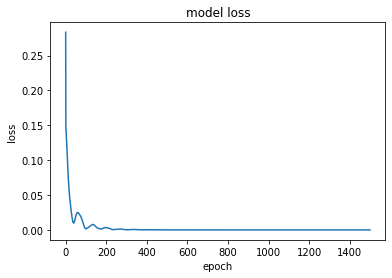

In [ ]:
history = model.fit(
  x_train_hist,
  y_train_hist,
  epochs=1500,
)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

here we get the $A^{-1}$ error mitigation matrix

In [ ]:
model.get_weights(), model.get_weights()[0].shape

([array([[ 1.2872256 , -0.12813386, -0.15214516, -0.00694683],
         [-0.30375087,  1.4236777 ,  0.02611452, -0.1460416 ],
         [-0.30150118, -0.02306748,  1.4599078 , -0.13533919],
         [ 0.06048129, -0.2813336 , -0.36348814,  1.5843403 ]],
        dtype=float32)], (4, 4))

here we evaluating with our test group - and we see it's working

In [ ]:
model.evaluate(
  x_test_hist,
  y_test_hist
)

1/1 [==============================] - 0s 17ms/step - loss: 8.5416e-05 - mse: 8.5416e-05


[8.541600982425734e-05, 8.541600982425734e-05]

In [ ]:
y_perdiction = model.predict(x_test_hist)

In [ ]:
x_test_hist*10000

array([[7358., 1453.,  985.,  204.]])

In [ ]:
y_perdiction*10000

array([[8745.416  , 1045.6813 ,  282.31778,  -73.4169 ]], dtype=float32)

In [ ]:
y_test_hist*10000

array([[8818.,  917.,  237.,   28.]])

we inverse our matrix and found out our $A$ matrix, and it's the same as the $\varepsilon$ and $\eta$ i wrote in the data

In [ ]:
np.linalg.inv(np.transpose(model.get_weights()[0]))

array([[0.81514513, 0.17481636, 0.17481771, 0.04003234],
       [0.07841437, 0.7323797 , 0.04040422, 0.13632604],
       [0.08811174, 0.02259792, 0.7188785 , 0.16557822],
       [0.01832902, 0.07020632, 0.0658997 , 0.65806353]], dtype=float32)

In [ ]:
A = np.linalg.inv(np.transpose(model.get_weights()[0]))

In [ ]:
A[:,0] , A[:,0].sum()

(array([0.81514513, 0.07841437, 0.08811174, 0.01832902], dtype=float32),
 1.0000002)

from the article we know that according to tensor product model - the weight matrix must be equal to four times of kronecker product of 1 qbit that we calculated theoretically...

In [ ]:
np.kron(np.array([[0.9,0.2],[0.1,0.8]]),np.array([[0.9,0.2],[0.1,0.8]]))

array([[0.81, 0.18, 0.18, 0.04],
       [0.09, 0.72, 0.02, 0.16],
       [0.09, 0.02, 0.72, 0.16],
       [0.01, 0.08, 0.08, 0.64]])

In [ ]:
np.array([[0.9,0.2],[0.1,0.8]])

array([[0.9, 0.2],
       [0.1, 0.8]])

# little more complicated - more than 1 qubit (simple - 2 qubits) only 4 angles

## First we'll create the simulative data of our Neural Network:
* Input - the read-out error measurements
* Output - the right measurements

the thing is because you need QVM server and quilc compiler - unfortunately you can't run the code inside google - you can generate locally only

### the code

The seed generator code for our angles

In [ ]:
seed = np.random.rand(100,4)

without readout error

In [ ]:
results = []
qc = get_qc('4q-qvm')
count = 0
for theta in tqdm_notebook(seed):
    program = Program()
    for i in range(4):
        program += RX(theta[i]*np.pi,i)
    results.append(qc.run_and_measure(program, trials=10000))

np.save('withoutErrorVer2_4qbits.npy', results)    

NameError: ignored

with readout error

In [ ]:
resultsWithError = []
qc1 = get_qc('4q-qvm')
for theta in tqdm_notebook(seed):
    program1 = Program()
    for i in range(4):
        program1 += RX(theta[i]*np.pi,i)
        program1.define_noisy_readout(i,0.9,0.8)
    resultsWithError.append(qc1.run_and_measure(program1, trials=10000))
    

np.save('withErrorVer2_4qbits.npy', resultsWithError)    


### the data itself

since i did it manually , i'll just upload here the data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withErrorVer2_4qbits.npy', allow_pickle=True)
y = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withoutErrorVer2_4qbits.npy', allow_pickle=True)

In [ ]:
x_layer = []
y_layer = []

for i in notebook.tqdm(range(4)):
  df_x = pd.DataFrame.from_dict(np.transpose(at(x[i], 0, 1)))
  df_y = pd.DataFrame.from_dict(np.transpose(at(y[i], 0, 1)))


  x_bit = []
  y_bit = []
  for j in range(10000):
    x_bit.append(int(df_x.iloc[j].to_string(header=False, index=False).replace("\n ","").replace(" ",""), 2))
    y_bit.append(int(df_y.iloc[j].to_string(header=False, index=False).replace("\n ","").replace(" ",""), 2))
  x_layer.append(x_bit)
  y_layer.append(y_bit)

In [ ]:
string = ["".join(seq) for seq in itertools.product("01", repeat=2)]
string

['00', '01', '10', '11']

histogram with error readout

In [ ]:
#np.histogram(x_layer[5], bins=string)[0]/np.histogram(x_layer[5], bins=string)[0].sum()
np.histogram(y_layer[3], bins=range(5))[0]/np.histogram(y_layer[3], bins=range(5))[0].sum()

array([0.0486, 0.2953, 0.0885, 0.5676])

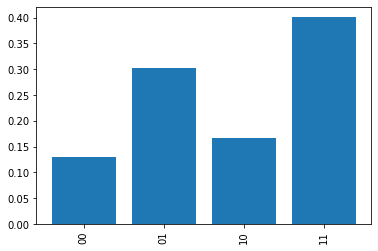

In [ ]:
data = np.histogram(x_layer[3], bins=range(5))[0]/np.histogram(x_layer[3], bins=range(5))[0].sum()
plt.bar(x=range(4), height=data, align='center')
plt.xticks(range(4), string, rotation='vertical')
plt.show()

histogram without error readout

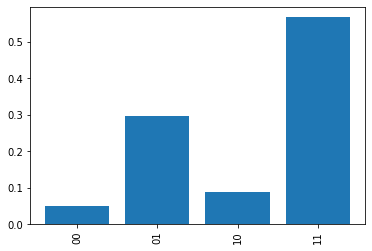

In [ ]:
data = np.histogram(y_layer[3], bins=range(5))[0]/np.histogram(y_layer[3], bins=range(5))[0].sum()
plt.bar(x=range(4), height=data, align='center')
plt.xticks(range(4), string, rotation='vertical')
plt.show()

##Our Neural Network model - with constrain weight **and** bias (change the activation function to linear...) **WORKING for 2 qubits**

In [ ]:
x_train_hist = []
x_test_hist = []
y_train_hist = []
y_test_hist = []

for i in range(4):
  x_train_hist.append(np.histogram(x_layer[i], bins=range(5))[0]/np.histogram(x_layer[i], bins=range(5))[0].sum())
  y_train_hist.append(np.histogram(y_layer[i], bins=range(5))[0]/np.histogram(y_layer[i], bins=range(5))[0].sum())

for i in range(1):
  x_test_hist.append(np.histogram(x_layer[i+3], bins=range(5))[0]/np.histogram(x_layer[i+3], bins=range(5))[0].sum())
  y_test_hist.append(np.histogram(y_layer[i+3], bins=range(5))[0]/np.histogram(y_layer[i+3], bins=range(5))[0].sum())

x_train_hist = np.array(x_train_hist)
x_test_hist = np.array(x_test_hist)
y_train_hist = np.array(y_train_hist)
y_test_hist = np.array(y_test_hist)


In [ ]:
np.linalg.matrix_rank(x_train_hist)

4

In [ ]:
keras.backend.clear_session()
del model

In [ ]:
model = Sequential([
  Dense(4, activation='linear', use_bias=False, kernel_constraint=NewUnitNorm(axis=1)),
])
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.99)

model.compile(
  optimizer=opt,
  loss = "mse",
  metrics=['mse'],
)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
1/1 [==============================] - 0s 4ms/step - loss: 7.1842e-04 - mse: 7.1842e-04
Epoch 502/3000
1/1 [==============================] - 0s 5ms/step - loss: 8.2928e-04 - mse: 8.2928e-04
Epoch 503/3000
1/1 [==============================] - 0s 5ms/step - loss: 9.2908e-04 - mse: 9.2908e-04
Epoch 504/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010
Epoch 505/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011
Epoch 506/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 507/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011
Epoch 508/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011
Epoch 509/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011
Epoch 510/3000
1/1 [==============================] - 0s 4ms/step - lo

Text(0.5, 0, 'epoch')

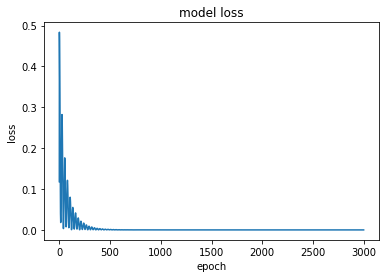

In [ ]:
history = model.fit(
  x_train_hist,
  y_train_hist,
  epochs=3000,
)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

here we get the $A^{-1}$ error mitigation matrix

In [ ]:
model.get_weights(), model.get_weights()[0].shape

([array([[ 1.4465894 , -0.34334207, -0.03661406, -0.06663336],
         [-0.4313256 ,  1.6031822 , -0.06277907, -0.10907771],
         [-0.43835282,  0.10748823,  1.340355  , -0.00949067],
         [ 0.16126122, -0.40253118, -0.27977434,  1.5210443 ]],
        dtype=float32)], (4, 4))

here we evaluating with our test group - and we see it's working

In [ ]:
model.evaluate(
  x_test_hist,
  y_test_hist
)

1/1 [==============================] - 0s 17ms/step - loss: 8.5416e-05 - mse: 8.5416e-05


[8.541600982425734e-05, 8.541600982425734e-05]

In [ ]:
y_perdiction = model.predict(x_test_hist)

In [ ]:
x_test_hist*10000

array([[7358., 1453.,  985.,  204.]])

In [ ]:
y_perdiction*10000

array([[8745.416  , 1045.6813 ,  282.31778,  -73.4169 ]], dtype=float32)

In [ ]:
y_test_hist*10000

array([[8818.,  917.,  237.,   28.]])

we inverse our matrix and found out our $A$ matrix, and it's the same as the $\varepsilon$ and $\eta$ i wrote in the data

for 1500 epoches

In [ ]:
np.linalg.inv(np.transpose(model.get_weights()[0]))

array([[ 8.0939245e-01,  1.7699721e-01,  1.8297902e-01,  4.1283399e-02],
       [ 1.1896230e-01,  7.0860100e-01,  3.8422737e-02,  1.4379527e-01],
       [ 5.4600704e-03,  6.7903876e-02,  7.7922559e-01,  1.3610715e-01],
       [ 6.6185273e-02,  4.6498079e-02, -6.2727946e-04,  6.7881423e-01]],
      dtype=float32)

for 3000 epoches

In [ ]:
np.linalg.inv(np.transpose(model.get_weights()[0]))

array([[0.74808973, 0.21145257, 0.22783117, 0.01855285],
       [0.16901144, 0.68035835, 0.00186378, 0.16247515],
       [0.03777105, 0.04982502, 0.755477  , 0.14814046],
       [0.04512793, 0.05836424, 0.01482825, 0.6708316 ]], dtype=float32)

In [ ]:
A = np.linalg.inv(np.transpose(model.get_weights()[0]))

In [ ]:
A[:,0] , A[:,0].sum()

(array([0.81514513, 0.07841437, 0.08811174, 0.01832902], dtype=float32),
 1.0000002)

from the article we know that according to tensor product model - the weight matrix must be equal to four times of kronecker product of 1 qbit that we calculated theoretically...

In [ ]:
np.kron(np.array([[0.9,0.2],[0.1,0.8]]),np.array([[0.9,0.2],[0.1,0.8]]))

array([[0.81, 0.18, 0.18, 0.04],
       [0.09, 0.72, 0.02, 0.16],
       [0.09, 0.02, 0.72, 0.16],
       [0.01, 0.08, 0.08, 0.64]])

In [ ]:
np.array([[0.9,0.2],[0.1,0.8]])

array([[0.9, 0.2],
       [0.1, 0.8]])

# little more complicated - more than 1 qubit (4 qubits)

## First we'll create the simulative data of our Neural Network of single qubit:
* Input - the read-out error measurements
* Output - the right measurements

the thing is because you need QVM server and quilc compiler - unfortunately you can't run the code inside google - you can generate locally only

### the code

The seed generator code for our angles

In [ ]:
seed = np.random.rand(100,4)

without readout error

In [ ]:
results = []
qc = get_qc('4q-qvm')
count = 0
for theta in tqdm_notebook(seed):
    program = Program()
    for i in range(4):
        program += RX(theta[i]*np.pi,i)
    results.append(qc.run_and_measure(program, trials=10000))

np.save('withoutErrorVer2_4qbits.npy', results)    

NameError: ignored

with readout error

In [ ]:
resultsWithError = []
qc1 = get_qc('4q-qvm')
for theta in tqdm_notebook(seed):
    program1 = Program()
    for i in range(4):
        program1 += RX(theta[i]*np.pi,i)
    program1.define_noisy_readout(0,0.9,0.8)
    resultsWithError.append(qc1.run_and_measure(program1, trials=10000))
    

np.save('withErrorVer2_4qbits.npy', resultsWithError)    


NameError: ignored

### the data itself

since i did it manually , i'll just upload here the data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withErrorVer2_4qbits.npy', allow_pickle=True)
y = np.load('/content/drive/MyDrive/Shared drive/Neural Network fully connected data/withoutErrorVer2_4qbits.npy', allow_pickle=True)

In [ ]:
x_layer = []
y_layer = []

for i in tqdm_notebook(range(100)):
  df_x = pd.DataFrame.from_dict(x[i])
  df_y = pd.DataFrame.from_dict(y[i])

  x_bit = []
  y_bit = []
  for j in range(10000):
    x_bit.append(int(df_x.iloc[j].to_string(header=False, index=False).replace("\n ","").replace(" ",""), 2))
    y_bit.append(int(df_y.iloc[j].to_string(header=False, index=False).replace("\n ","").replace(" ",""), 2))
  x_layer.append(x_bit)
  y_layer.append(y_bit)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
string = ["".join(seq) for seq in itertools.product("01", repeat=4)]
string

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

histogram with error readout

In [ ]:
#np.histogram(x_layer[5], bins=string)[0]/np.histogram(x_layer[5], bins=string)[0].sum()
np.histogram(y_layer[11], bins=range(17))[0]/np.histogram(y_layer[11], bins=range(17))[0].sum()

array([1.956e-01, 1.090e-02, 6.400e-03, 7.000e-04, 1.531e-01, 8.500e-03,
       3.500e-03, 4.000e-04, 3.229e-01, 1.700e-02, 1.000e-02, 3.000e-04,
       2.485e-01, 1.380e-02, 8.200e-03, 2.000e-04])

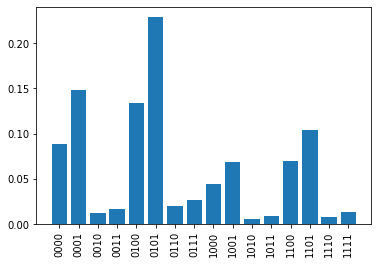

In [ ]:
data = np.histogram(x_layer[0], bins=range(17))[0]/np.histogram(x_layer[0], bins=range(17))[0].sum()
plt.bar(x=range(16), height=data, align='center')
plt.xticks(range(16), string, rotation='vertical')
plt.show()

histogram without error readout

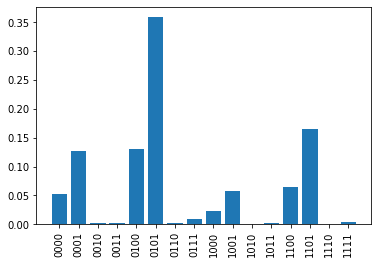

In [ ]:
data = np.histogram(y_layer[0], bins=range(17))[0]/np.histogram(y_layer[0], bins=range(17))[0].sum()
plt.bar(x=range(16), height=data, align='center')
plt.xticks(range(16), string, rotation='vertical')
plt.show()

##Our Neural Network model - with constrain weight **and** bias (change the activation function to linear...) **WORKING for 4 qubits**

In [ ]:
x_train_hist = []
x_test_hist = []
y_train_hist = []
y_test_hist = []

for i in range(90):
  x_train_hist.append(np.histogram(x_layer[i], bins=range(17))[0]/np.histogram(x_layer[i], bins=range(17))[0].sum())
  y_train_hist.append(np.histogram(y_layer[i], bins=range(17))[0]/np.histogram(y_layer[i], bins=range(17))[0].sum())

for i in range(10):
  x_test_hist.append(np.histogram(x_layer[i+90], bins=range(17))[0]/np.histogram(x_layer[i+90], bins=range(17))[0].sum())
  y_test_hist.append(np.histogram(y_layer[i+90], bins=range(17))[0]/np.histogram(y_layer[i+90], bins=range(17))[0].sum())

x_train_hist = np.array(x_train_hist)
x_test_hist = np.array(x_test_hist)
y_train_hist = np.array(y_train_hist)
y_test_hist = np.array(y_test_hist)


In [ ]:
np.linalg.matrix_rank(x_train_hist)

16

In [ ]:
keras.backend.clear_session()
del model

In [ ]:
model = Sequential([
  Dense(16, activation='linear', use_bias=False, kernel_constraint=NewUnitNorm(axis=1)),
])
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.99)

model.compile(
  optimizer=opt,
  loss = "mse",
  metrics=['mse'],
)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
3/3 [==============================] - 0s 2ms/step - loss: 0.0137 - mse: 0.0137
Epoch 502/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.0126 - mse: 0.0126
Epoch 503/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.0139 - mse: 0.0139
Epoch 504/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.0108 - mse: 0.0108
Epoch 505/3000
3/3 [==============================] - 0s 4ms/step - loss: 0.0133 - mse: 0.0133
Epoch 506/3000
3/3 [==============================] - 0s 3ms/step - loss: 0.0117 - mse: 0.0117
Epoch 507/3000
3/3 [==============================] - 0s 6ms/step - loss: 0.0128 - mse: 0.0128
Epoch 508/3000
3/3 [==============================] - 0s 5ms/step - loss: 0.0108 - mse: 0.0108
Epoch 509/3000
3/3 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 510/3000
3/3 [==============================] - 0s 5ms/step - loss: 0.0132 - mse: 0.0132

Text(0.5, 0, 'epoch')

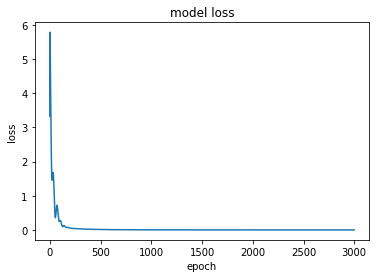

In [ ]:
history = model.fit(
  x_train_hist,
  y_train_hist,
  epochs=3000,
)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

here we get the $A^{-1}$ error mitigation matrix

In [ ]:
model.get_weights(), model.get_weights()[0].shape

([array([[ 1.66361403e+00,  2.43239235e-02, -2.01602682e-01,
           1.97047349e-02, -2.13967841e-02, -1.56399950e-01,
           1.56941921e-01, -2.07721025e-01, -2.69495189e-01,
           1.23405889e-01,  2.40728512e-01, -8.98965523e-02,
          -2.10598007e-01,  9.46756899e-02, -9.52588245e-02,
          -7.10258409e-02],
         [-3.53451550e-01,  1.54857945e+00,  3.78731526e-02,
          -2.32800215e-01, -2.65384495e-01,  4.56743017e-02,
          -2.08001211e-01,  3.63383710e-01,  1.62730381e-01,
          -4.19994414e-01, -3.57848853e-01,  1.80393904e-01,
           3.77867728e-01, -1.38030365e-01,  1.42912000e-01,
           1.16096281e-01],
         [-3.61019701e-01, -2.97604203e-01,  1.86754429e+00,
          -2.43454799e-01, -2.19310507e-01,  2.50911623e-01,
          -4.04502213e-01,  3.31613064e-01,  1.43599033e-01,
          -1.37625620e-01, -5.18582404e-01,  1.55236542e-01,
           3.23707908e-01, -1.50305942e-01,  1.54753521e-01,
           1.05039328e-01],
 

here we evaluating with our test group - and we see it's working

In [ ]:
model.evaluate(
  x_test_hist,
  y_test_hist
)

1/1 [==============================] - 0s 15ms/step - loss: 4.0101e-04 - mse: 4.0101e-04


[0.00040100555634126067, 0.00040100555634126067]

In [ ]:
y_perdiction = model.predict(x_test_hist)

In [ ]:
x_test_hist*10000

array([[1408.,  177.,  670.,   61., 1653.,  198.,  755.,   89., 1350.,
         178.,  666.,   70., 1647.,  198.,  779.,  101.],
       [ 132.,  248.,  514.,  955.,  203.,  311.,  742., 1364.,  201.,
         295.,  604., 1142.,  277.,  447.,  926., 1639.],
       [ 461., 1356.,   77.,  234.,  423., 1347.,   67.,  203.,  609.,
        1931.,  125.,  314.,  596., 1848.,  103.,  306.],
       [ 309.,  148.,   46.,   20.,  908.,  391.,  124.,   55., 1341.,
         552.,  167.,   75., 3727., 1489.,  443.,  205.],
       [ 833.,   89., 3206.,  348.,  848.,   89., 3156.,  399.,  119.,
           6.,  355.,   46.,   84.,    8.,  375.,   39.],
       [ 139.,  582.,  219.,  827.,   25.,   80.,   34.,  125.,  664.,
        2454.,  819., 3080.,   91.,  323.,  121.,  417.],
       [ 321., 1108.,  387., 1379.,  130.,  483.,  151.,  624.,  334.,
        1250.,  499., 1662.,  184.,  586.,  193.,  709.],
       [1220., 3229.,  415., 1016.,  603., 1568.,  211.,  531.,  198.,
         409.,   55.,  173

In [ ]:
y_perdiction*10000

array([[ 1.08166577e+03,  6.38113632e+01,  5.38408447e+02,
        -2.91062641e+01,  1.87176196e+03, -2.98887181e+00,
         8.10407532e+02, -3.27056961e+01,  1.33219312e+03,
         6.59842758e+01,  7.20322571e+02, -2.64208164e+01,
         2.44038574e+03,  2.98247147e+01,  1.11214575e+03,
         2.43094940e+01],
       [-1.80977745e+01, -2.83147202e+01,  2.41432434e+02,
         8.33795227e+02, -1.80002327e+01,  3.54760349e-01,
         5.01546234e+02,  2.00597791e+03,  8.77450867e+01,
        -6.63275576e+00,  3.18426514e+02,  1.49730505e+03,
         1.39845673e+02,  1.58801050e+01,  1.02296509e+03,
         3.40577026e+03],
       [ 1.51252533e+02,  1.09729785e+03, -1.04378872e+01,
         1.25303802e+02,  5.10667114e+01,  1.59864282e+03,
        -2.15538349e+01,  9.87993088e+01,  1.33759995e+02,
         2.69752246e+03,  2.33440819e+01,  1.46618378e+02,
         2.71220398e+02,  3.35966797e+03,  3.03545971e+01,
         2.47139465e+02],
       [-5.20486031e+01,  2.33189133e

In [ ]:
y_test_hist*10000

array([[1.036e+03, 2.000e+00, 5.160e+02, 1.000e+00, 1.882e+03, 2.000e+00,
        8.670e+02, 1.000e+00, 1.465e+03, 1.000e+00, 6.740e+02, 0.000e+00,
        2.411e+03, 2.000e+00, 1.140e+03, 0.000e+00],
       [3.000e+00, 1.300e+01, 2.000e+02, 7.950e+02, 8.000e+00, 2.300e+01,
        5.640e+02, 1.961e+03, 5.000e+00, 2.600e+01, 4.320e+02, 1.391e+03,
        1.200e+01, 4.700e+01, 9.580e+02, 3.562e+03],
       [7.200e+01, 1.268e+03, 5.000e+00, 1.000e+02, 9.900e+01, 1.422e+03,
        4.000e+00, 9.600e+01, 1.770e+02, 2.792e+03, 1.100e+01, 1.930e+02,
        2.330e+02, 3.245e+03, 1.700e+01, 2.660e+02],
       [4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 3.400e+01, 1.200e+01,
        1.000e+00, 0.000e+00, 5.960e+02, 2.130e+02, 9.000e+00, 6.000e+00,
        6.436e+03, 2.472e+03, 1.590e+02, 5.600e+01],
       [9.000e+00, 0.000e+00, 4.183e+03, 1.600e+01, 1.600e+01, 0.000e+00,
        5.697e+03, 2.600e+01, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 3.900e+01, 0.000e+

we inverse our matrix and found out our $A$ matrix, and it's the same as the $\varepsilon$ and $\eta$ i wrote in the data

In [ ]:
np.linalg.inv(np.transpose(model.get_weights()[0]))

array([[ 6.47489667e-01,  1.55373633e-01,  1.57419831e-01,
         1.64835621e-02,  1.61310196e-01,  1.23048304e-02,
         2.02641618e-02,  3.26818749e-02,  1.54856995e-01,
         2.28387304e-02,  1.73052046e-02,  2.84028649e-02,
         2.22144946e-02,  2.15548333e-02,  2.00118162e-02,
        -1.81606151e-02],
       [ 3.53239663e-02,  6.32102787e-01,  6.49467632e-02,
         6.10260293e-02,  6.22787513e-02,  3.90237384e-02,
        -5.83683923e-02,  1.57267213e-01,  5.22007570e-02,
         8.05748552e-02, -6.65101260e-02,  1.30428314e-01,
        -3.80816907e-02,  1.06481001e-01,  6.27815127e-02,
        -9.50933844e-02],
       [ 6.09036200e-02,  3.16735879e-02,  6.04863167e-01,
         1.02827907e-01,  3.09030972e-02, -2.19175927e-02,
         1.02945618e-01,  7.04780594e-02,  2.47779787e-02,
        -9.71398596e-03,  1.07357852e-01,  5.94147369e-02,
        -6.42470177e-03,  2.16920413e-02,  4.30255048e-02,
        -2.26272140e-02],
       [ 1.51141817e-02,  5.47869019e

from the article we know that according to tensor product model - the weight matrix must be equal to four times of kronecker product of 1 qbit that we calculated theoretically...

In [ ]:
np.kron(np.array([[0.9,0.2],[0.1,0.8]]),np.kron(np.array([[0.9,0.2],[0.1,0.8]]),np.kron(np.array([[0.9,0.2],[0.1,0.8]]),np.array([[0.9,0.2],[0.1,0.8]]))))

array([[6.561e-01, 1.458e-01, 1.458e-01, 3.240e-02, 1.458e-01, 3.240e-02,
        3.240e-02, 7.200e-03, 1.458e-01, 3.240e-02, 3.240e-02, 7.200e-03,
        3.240e-02, 7.200e-03, 7.200e-03, 1.600e-03],
       [7.290e-02, 5.832e-01, 1.620e-02, 1.296e-01, 1.620e-02, 1.296e-01,
        3.600e-03, 2.880e-02, 1.620e-02, 1.296e-01, 3.600e-03, 2.880e-02,
        3.600e-03, 2.880e-02, 8.000e-04, 6.400e-03],
       [7.290e-02, 1.620e-02, 5.832e-01, 1.296e-01, 1.620e-02, 3.600e-03,
        1.296e-01, 2.880e-02, 1.620e-02, 3.600e-03, 1.296e-01, 2.880e-02,
        3.600e-03, 8.000e-04, 2.880e-02, 6.400e-03],
       [8.100e-03, 6.480e-02, 6.480e-02, 5.184e-01, 1.800e-03, 1.440e-02,
        1.440e-02, 1.152e-01, 1.800e-03, 1.440e-02, 1.440e-02, 1.152e-01,
        4.000e-04, 3.200e-03, 3.200e-03, 2.560e-02],
       [7.290e-02, 1.620e-02, 1.620e-02, 3.600e-03, 5.832e-01, 1.296e-01,
        1.296e-01, 2.880e-02, 1.620e-02, 3.600e-03, 3.600e-03, 8.000e-04,
        1.296e-01, 2.880e-02, 2.880e-02, 6.400e-